# Explore here

Loading the dataset

In [3]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Select the three useful variables

In [5]:
X = total_data[["MedInc", "Latitude", "Longitude"]] #Medium income
X.head() # gives us the first 5 rows

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Divide the dataset into train and test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
X_train.head()

X_train.shape

(16512, 3)

Build a K-Means

In [13]:
from sklearn.cluster import KMeans

model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42) # we do not give a target
model_unsup.fit(X_train) # find the 6 clusters, X_train

KMeans(n_clusters=6, random_state=42)

See results given by trained dataset ("y": cluster column)

In [15]:
y_train = list(model_unsup.labels_) # what is happening here????
X_train["cluster"] = y_train # insert results of training in the new "cluster" column
X_train.head() # show first 5 rows

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


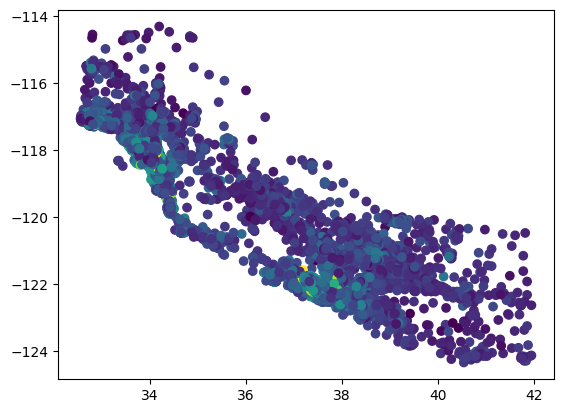

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X_train["Latitude"], X_train["Longitude"], c = X_train["MedInc"]) # to see which color is high/low, use seaborn, is better because it gives a legend with hue

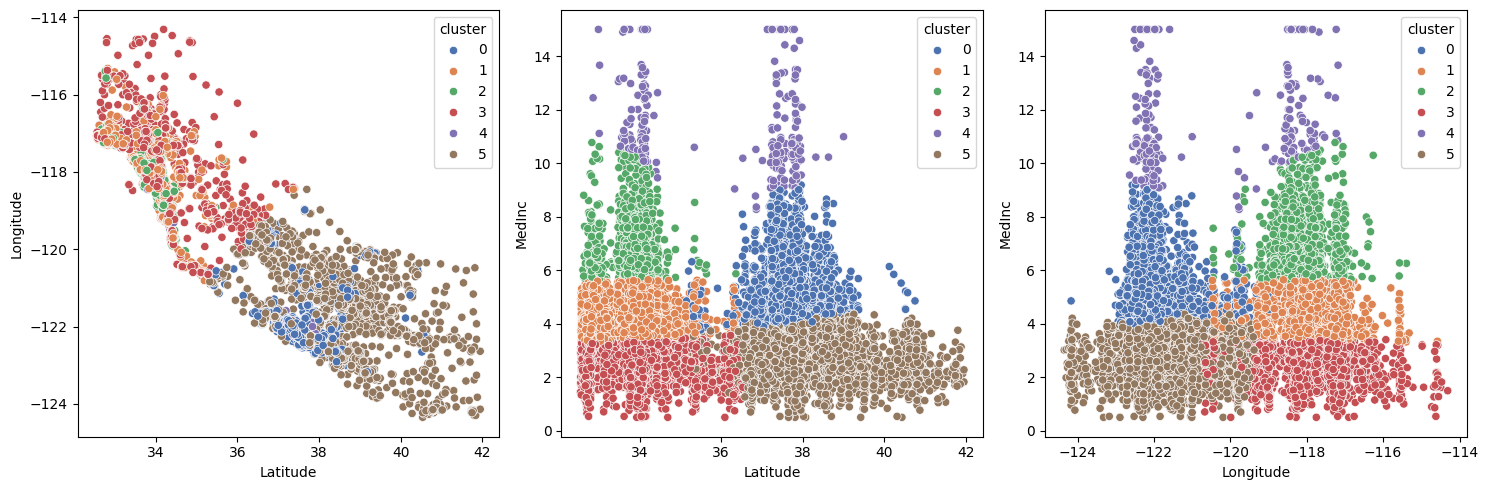

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5)) # what is this?

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show() # how do we know what 0, 1, 2 etc mean? How rich is this household, how do I know if blue is rich or poor?

Predict with the test set

In [18]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head() #no accuracy whatsoever at this point

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5
